In [11]:
import random
import os
import pickle

In [5]:
# , "Муниципальное заведение"
categories = ['Парк', 'Набережная', 'Кафе', 'Развлекательный центр', 'Достопримечательность','Культура','Жилой квартал']
locations = {'Парк':['Динамо', "Комсомольский", "ЦПКиО", "им. Горького", "Дендрарий", "Победы", "Византийский сад", "Райский сад", "Вишневый сад"], 
             'Набережная': ["Масалитинова", "Макарова", "Нижняя", "Верхняя", "Постышева", "Морская", "Черепаховая", "Куликовская"], 
             'Кафе':['Рататуй', "Имбирь", "Ичираку рамен", "Виктория", "Вкус Детства", "Имбирь", "Жадина Говядина", "Байкал", "Сибирь", "Токио","Крастикраб", "Маленькая Италия", "Океан"], 
             'Развлекательный центр':["Карусель", "Боулинг", "Микс", "Мир", "Твикс", "Остров пиратов", "Карибы", "Молл"],
             'Достопримечательность':['Памятник Мстителям', "Арка искусств", "Мемориал пожарным", "Скульптура фонарщика", "Памятник великой черепахе", "Стена хокаге", "Дворец принцессы", 'Домики Шира', "Граффити СоюзМультфильм", "Кошкин дом", "Тролли"],
             'Культура':["Музей сладостей", "Театр аниме", "Кинотеатр Максима", "Драмтеатр", "КинотеатрМолл", "Музей черепах", "Музей истории", "Галлерея кинематографии", "Галерея Детроит", "Музей чипсов", "Музей Мстителей", "Театр Картинки кино", "Галерея"],
             'Жилой квартал':['Жемчужина', 'Стрижи', "Ласточка", "Зверополис", "Домино", "Изумрудный город", "Тридевятое Королевство","Гравити Фолз", "Готэм-Сити", "Спрингфилд",]
            }

In [6]:
def generate_density(cat, district, problem):
    week = ['Понедельник', "Вторник", "Среда","Четверг", "Пятница", "Суббота", "Воскресенье"]
    density = '<div class="chart">\n\
        <b>Посещаемость:</b>\n'
    avg_density=70
    
    models = [True,False]
    model = models[random.randint(0,1)]
    like = random.randint(40, 100)
    
    if district == 1 and cat == 'Развлекательный центр' and not problem:
        model = False
        avg_density=15
        problem=True
        like = random.randint(10, 25)
        
    if district == 2 and cat == 'Парк' and not problem:
        avg_density=30
        problem=True
        like = random.randint(10, 25)
    
    if district == 3 and cat == 'Жилой квартал' and not problem:
        avg_density=40
        problem=True
        like = random.randint(10, 25)
        
    for w in week[:-2]:
        if model:
            #в будни больше
            d = random.randint(int(avg_density/2),avg_density)
            d2 = random.randint(int(avg_density/4),int(avg_density/2))
        else:
            #в выходные больше
            d = random.randint(int(avg_density/4),int(avg_density/2))
            d2 = random.randint(int(avg_density/2),avg_density)
            
        density+='<div><div class="line">'+w+'</div>\n\
            <div class="pipe line">\n\
            <div style="width: '+str(d)+'%"> </div>\n\
            </div></div>\n'
        
    for w in week[-2:]:
        density+='<div><div class="line">'+w+'</div>\n\
            <div class="pipe line">\n\
            <div style="width: '+str(d2)+'%"> </div>\n\
            </div></div>\n'   
        
    return density+'</div>\n', problem, like

In [59]:
def get_negative(category, date, time, location):
    
    dict_words=['Дизлайк!', "Не рекомендую.", "", ':(', "Ужас...", "Жалко..."]
    
    #ТЦ
    temp=['ТЦ', "тц", "развлекательный центр", "ТРК"]
    review1 = '''%s всей семьёй решили выбраться в %s %s, чтобы и по магазинам пройтись и детей выгулять, плюс магазин красиво украшен, 
    сразу создаётся новогоднее настроение. Поехали в мегу только из-за большой детской площадки, чтобы и детки побегали и мама смогла пробежаться по магазинам. 
    Папа остался сидеть на пуфике и следить за детьми, кто бы знал, что следить надо не за детьми, а за сапогами! Причём сперли только один сапог! 
    Либо не успели второй прихватить, либо надеялись, что второй мы там и оставим и они его тоже заберут. Понятия не имеем зачем это было сделано. 
    Самое интересное, что камера находилась за столбом от стоящих сапог и сидящего папы. Обошли площадку раза 4, раза 3 обошли площадку охранники и ещё искали уборщицы. 
    Итог: пришлось покупать новые сапоги. Надеюсь это не делают продажи обувные магазины вокруг. %s''' % (temp[random.randint(0, len(temp)-1)], date, location, dict_words[random.randint(0, len(dict_words)-1)])
    
    review2  = '''Кто регулирует звук музыкального сопровождения в ТЦ %s?
    Это просто беспредел!
    Можно же вкус в фоновом режиме!
    Они же включают на максимальную громкость! %s''' %(locations, dict_words[random.randint(0, len(dict_words)-1)])
    
    
    review3 = '''Хожу в этот %s уже более 4 месяцев/
    Lа, согласен комплекс красивый и большой.
    Но количество закрытых магазинов поражает!!!!
    Отсюда вывод наверно безумная аренда!
    Жаль а могли бы быть лучшем комплексом в округе.'''%(temp[random.randint(0, len(temp)-1)])
    
    review4 = '''Охрана ТЦ %s ведет себя как сторож в колхозе. %s на первом этаже приблизительно в %s мою жену из ТЦ 
    вывел охранник с применением силы, говоря что моя супруга находится в состоянии алкогольного опъянения и на возражение "Я жду мужа из туалета" 
    он выталкал мою жену из ТЦ.''' % (location, date, time)
    
    #Парки
    
    review5 = '''Очень громко со всех сторон играла музыка, так, что хотелось бежать, и дети прикрывали уши руками. Обстановка напряженная. 
    По парку ходят торговцы цветными надувными шариками, и дети начинают ныть и просить - разводилово. Покататься и поиграть детям почти негде - 
    одна примитивная винтажная каруселька за 250 рублей с ребенка - на порядок дороже заграничных аналогов. Туалет закрыт, в рестораны очереди, 
    только банальная детская площадка, которые можно найти во многих дворах, неизменно приветливо встречает детей, но для этого не стоит тащиться в центр. 
    Много людей, суетно, противно. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review6 = '''Возможно, когда парк доделают он будет похож "на современный парки", но пока это старые развалины даже без возможности прокатиться на аттракционах. 
    Пуфики и шезлонги очень милы, но ради них ехать так далеко нет смысла.
    Лично для меня, на данный момент администрация парка убила все хоть немного хорошее, что в нем было. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review7 = '''Народу - толпы. Парковка заполнена до предела. На аттракционы (прокат веломобилей и катамаранов) огромные очереди. 
    При этом свободных веломобилей полная площадка. Видимо сотрудники не получают процент с продаж, поэтому им наплевать на клиентов. 
    В общепиты тоже кое-где очереди, но меньше. С голоду не умрете. Хотя найти мороженое вечером - проблема. Я купил последнее во всем парке! 
    Вайфай кое-где ловится, но не работает. Ну и ладно, 3G решает.
    В целом интересно посетить, погулять и посмотреть, но не ждите отдыха. Речь идет про вечер рабочего дня часов в 8-9.  %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review8 = '''Прекрасный парк, на глазах меняющийся в лучшую сторону! 
    Неприятно удивили лишь некоторые цены, например в палатке с различными чаями, предложили напиток - стакан "родниковой воды" с 
    небольшим количеством ягод (морошка, брусника) на дне за 300 рублей. Космическая цена для не слишком вкусного утоления жажды. 
    Персонал приветлив, но желания возвратиться нет!%s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    #ЖК
    
    review9 = '''Очень тяжело ездить на работу.
    Если ехать на авто, то только центра будете ехать приблизительно час.
    Обратно то же самое, бывает совсем плохо.
    Если на общественном транспорте, то до пересажки минут 40-50, а потом ещё 25 минут. Народу тьма, очень тяжелая дорога. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review10 = '''Тяжёлое место. Жила там пару месяцев. Достаточно чисто, тихо, только ветер слышно. Ветренно настолько, что кажется унесёт вас на край земли.
    Дешёвые квартиры. Дешевле, чем в других местах. Многие покупают квартиру в ЖК %s и ездят по утрам на работу в соседние районы. Так сделала и я.
    Тяжело только потому, что неуютно. Сходить особо не куда. На выходных всё равно приходилось ездить в другие места развлекаться. 
    Кино нет, так же как и театра самого малюсенького. Зато школы и детские сады.''' % (location)
    
    review11 = '''Попадаешь в место домов-высоток разных цветов, расположенных вблизи друг от друга. Конечно куча магазинов, салонов красоты. Всё рядом.
    Есть скамейки, аллеи с зелеными участками, дизайн территории продуман. Но есть одно но. Урны полные мусора. Возле некоторых магазинов валяется мусор. 
    Где-то недостроены дороги, без асфальта, все в грязи. Никто не убирает улицы.  %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review12 = '''Отсутствие инфраструктуры, нет работы, постоянные пробки, неблагополучная криминогенная ситуация. 
    Есть только пара более-менее просторных улиц, остальные явно узкие. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    reviews = []
    
    
    malls = [review1, review2, review3, review4]
    parks = [review5, review6, review7, review8]
    houses = [review9, review10, review11, review12]
    
    if category == 'Развлекательный центр':
        reviews = malls
    
    if category == 'Парк':
        reviews = parks
    
    if category == 'Жилой квартал':
        reviews = houses
    
    random_ID = random.randint(0, len(reviews)-1) 
    review = reviews[random_ID]
    
    if review in used_reviews[category]:
        review = get_negative(category, date, time, location)
        
    used_reviews[category].append(review)
    
    return review

In [60]:
def get_positive(category, date, time, location, bill):
    
    dict_words=['Ставлю свой заслуженный лайк!', "Всем рекомендую!", "", 'Это нужно видеть самому)', "Приходите, не пожалеете.", "Тысячу раз рад здесь родиться"]
    
    #ТЦ
    
    review1 = '''В ТЦ %s бываем достаточно часто, все-таки здесь делать покупки получается реально выгоднее, чем во многих других местах. 
    Можно даже всей семьей отправляться сюда в выходной день - всем найдется занятие по вкусу. Бутики тут наверно на все случаи жизни, 
    можно купить все желаемое, и в одном месте. Так что рекомендую! %s''' % (location, dict_words[random.randint(0, len(dict_words)-1)])
    
    review2 = '''Самый любимый торговый центр. Из минусов – платная парковка, из-за которой сложно припарковаться стало. 
    А в остальном одни плюсы. Выполнен в европейском стиле, нет излюбленного многими предпринимателями "колхозного"оформления, когда на каждых 5 см. кто во что горазд. 
    Представлены все виды товаров, различные кафе. Радует большое количество санитарных комнат, где всегда чисто, есть мыло, работают сушилки для рук. 
    Проводятся различные фестивали и ярмарки. Так же на последнем этаже размещён огромный и самый популярный кинотеатр "Киномакс", для детей есть 
    очень много развлечений: качели, карусели, и поезд, который покатает ваших деток, на первом этаже есть прокат детских автомобилей и гироскутеров, 
    так же есть огромный супермаркет Лента, где цены самые низкие, а качество товара отличное. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review3 = '''Всем доброго дня! Я уже не первый раз посещаю торговый центр %s. В принципе меня там всё устраивает. 
    Удобно добираться, чисто, свободно, большой ассортимент товара на любой вкус. Но при последнем посещении я обнаружила, что на 10- той линии открылся новый 
    павильон - домашний текстиль от Ивановской фабрики. Халатики, пижамы, туники и др. Качество отличное, большлй ассортимент, а цены как удивили - низкие! 
    Можно купить и оптом и в розницу. Продавец очень внимательная, вежливая! У меня немного нестандартная фигура, так продавец проявила понимание и терпение, 
    в итоге покупкой я осталась очень довольна! %s''' % (location, dict_words[random.randint(0, len(dict_words)-1)])
    
    review4 = '''Мы тоже очень полюбили этот центр %s, хотя поначалу переживали по поводу прежнего кинотеатра. 
    Мало похожих ТРЦ с такой удобной планировкой. Тут всегда просторно, в любое время дня. Как-то продуманы потоки посетителей, что всем хватает места. 
    А уж 4-ый этаж просто красота. Балкон со столиками очень радует. %s''' % (location, dict_words[random.randint(0, len(dict_words)-1)])
    
    #Парки
    
    review5 = '''Хороший стал парк, есть где погулять с детьми, покушать, поиграть, посмотреть, всё красиво и ухожено! %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review6 = '''Очень спокойное, интересное место, где можно отдохнуть , заняться спортом, провести выходные и великолепные ночи в открытом кинотеатре. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review7 = '''Одно из лучших мест в нашем городе после реконструкции. Просто пройтись после работы, посидеть на набережной, выпить кофе и сбросить напряжение за день. 
    Всё продумано и сделано для людей, на любой вкус — от теннисных столов и танцевальной эстрады до фотографии и кино. Чисто, уютно и улыбчиво:) Спасибо! %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review8 = '''Парк, конечно, замечательный. Но сейчас мне больше всего в нем нравятся танцевальные площадки, которые находятся на набережной у пешеходного моста через 
    реку. Все семь дней в неделю можно придти и потанцевать в паре, если Вы умеете, или придти чуть пораньше и поучиться. Какая же это романтика, 
    когда летом ты танцуешь под вечереющим небом, а в реке отражаются огни подсветки и фонарей... и плывут кораблики :) %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    #ЖК
    
    review9 = '''Жилой комплекс «%s» достаточно новый, примерно 2016 года постройки. Состоит из одного центрального 7-ми этажного здания, нескольких таунхаусов и 
    нескольких квадрохаусов. 
    То есть это очень удобная малоэтажная застройка из домиков в три этажа. Домики на достаточно обширной территории, которая огорожена забором, под охраной и видеонаблюдением. 
    Своя детская площадка, спортивный корт. Много мест для парковок, зеленые газоны и клумбы.''' % (location)
    
    review10 = '''Преддомовая территория покрыта качественным газоном причем настоящим, детская площадка просто загляденье, огромная парковка за жилой зоной, 
    пешеходные дорожки выложены 
    тратуарной плиткой, уличное освещение просто замечательное, всё хорошо. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review11 = '''Мы живем тут уже три года. Транспортная доступность здесь отличная. На 19 автобусе, который останавливается возле дома, 
    мы можем доехать практически до любого социального объекта в городе, будь то больница, МФЦ, налоговая и многое другое.  
    Детская и взрослая поликлиника находится в одном из домов ЖК спутник, есть детский сад, множество секций и кружков для детей и взрослых, 
    очень не плохой государственный лицей, сетевые магазины и многое другое.'''
    
    review12 = '''Купили квартиру здесь 2,5 года назад. район очень нравится. В первую очередь подкупает простор и тишина. Живем сколько времени, и наслаждаемся этим 
    все больше и больше. Даже карантин, когда все дома сидели, у нас как то легко прошел, мы гуляли, здесь людей не много, в подъезде опять же чисто. Кстати, управляющая 
    компания здесь работает отлично, возле домов чистота, в подъездах каждый день убирают. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    #Набережные
    
    review13 = '''Можно спуститься к морю. Пляж галечный. Водичка прозрачная. Можно просто постоять у парапета, вглядываясь в морскую даль.
    Попадаются деревья с пышной кроной и усыпанные цветами кусты.
    Если вы проголодались, вас ждут многочисленные заведения общепита.
    Кроме этого, есть несколько точек с развлечениями типа стрельбы по банкам из ружья и метания дротиков в воздушные шарики. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review14 = '''Очень чисто и красиво. Хорошо оформлены аллеи, клумбы. Есть чистые бесплатные туалеты на протяжении всей набережной, 
    в туалете есть вода и туалетная бумага, здесь по времени работает уборщица, что приятно удивило. Много фонарей, вечером тут красотища.
    Хорошее зонирование. Много площадок для детей. Сделано так, что можно детям бегать и падать и не беспокоиться о разбитых коленях, 
    поскольку мягкий пол. Много лазилок, качелек, лавочек. Для мамочек с детьми здесь просто идеальное место! %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    review15 = '''Сейчас набережная %s это место отдыха как молодежи, так и пожилых людей, а так же семей с детьми разного возраста. 
    Летом вечерами на набережной проводятся различные мероприятия, открыты разные мастер-классы и аттракционы.''' % (location)
    
    review16 = '''Можно не только погулять, но и подкрепиться. Очень понравилась большая детская площадка, где для детей установлены различные зоны для игр.
    Также приятно удивило наличие площадки с тренажёрами для разной возрастной категории.'''
    
    #Кафе
    food = ['Цезарь', "Картошка фри", "Греческий", "Креветки в панировке", "Пиццу"]
    review17 = '''Мне здесь понравилась кухня. Я заказывала блюдо «%s» осталась очень довольна качеством. Интерьер полностью соответствует названию ресторана. 
    Очень хорошее обслуживание официантов. Как ни странно в ресторане %s очень хороший и чистый туалет. Сюда пришли, так как меня больше интересовала музыка, а в остальном 
    было приятным дополнением.'''% (food[random.randint(0, len(food)-1)], location)
    
    review18 = '''Заведение замечательное, хожу сюда постоянно уже на протяжении 8 лет. В заведении вкусные блюда и напитки. Обслуживание хорошее, сотрудники вежливые и 
    работают быстро. В заведении интерьер и музыка в тематике рок энд ролла. Особенно мне нравится музыка и атмосфера. Внутри все комфортно и чисто.'''
    
    review19 = '''Периодически заглядываю на бизнес ланч,когда хочется разнообразия — очень достойное место и чек меня устраивает: %s! Приятный интерьер,все вкусно,обязательно когда нибудь устрою
    себе и своим близким гастрономический вечер и попробую все блюда основного меню)))'''% (str(bill/2))
    
    review20 = '''Лучшее место, где можно потусоваться в любой день недели. Цены вполне доступные, разнообразное барное меню, дымные кальяны. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    #Культура
    
    review21 = '''Были здесь %s. Место интересное, цены вполне уместные. Рекомендую сходить в %s как взрослым, так и детям.''' % (date, location)
    
    review22 = '''Были там с друзьями. Всё очень понравилось, интересно провели время. Всем рекомендую.'''
    
    review23 = '''Ходили туда семьёй %s. Детям понравилось, нам тоже. Помимо самого развлечения есть ещё хорошее кафе. Не жалеем о том, что мы туда сходили.''' % (location)
    
    #Достопремечательности
    
    review24 = '''Место крайне интересное, дизайнер хорошо постарался. Молодёжь любит ходить сюда. Мне всё понравилось! %s Супер! %s''' %(location, dict_words[random.randint(0, len(dict_words)-1)])
    
    review25 = '''Гулял тут с девушкой, хорошо провели вечер. Вечером здесь включают подсветку, всё становится ещё лучше. Так что предлагаю вам посетить %s.''' % (location)
    
    review26 = '''Ходила сюда с ребёнком, хорошо погуляли. Доченьке понравилось. Думаем вернуться сюда на следующей неделе. %s''' %(dict_words[random.randint(0, len(dict_words)-1)])
    
    reviews = []
    
    malls = [review1, review2, review3, review4]
    parks = [review5, review6, review7, review8]
    houses = [review9, review10, review11, review12]
    embankment = [review13, review14, review15, review16]
    caffees = [review17, review18, review19, review20]
    culture = [review21, review22, review23]
    sights = [review24, review25, review26]
     
    if category == 'Развлекательный центр':
        reviews = malls
    
    if category == 'Парк':
        reviews = parks
    
    if category == 'Жилой квартал':
        reviews = houses
        
    if category == 'Набережная':
        reviews = embankment
        
    if category == 'Кафе':
        reviews = caffees
        
    if category == 'Культура':
        reviews = culture
        
    if category == 'Достопримечательность':
        reviews = sights
        
    random_ID = random.randint(0, len(reviews)-1) 
    review = reviews[random_ID]
    if review in used_reviews[category]:
        random_ID=random.randint(0, len(reviews)-1)
#         print(random_ID)
        review = get_positive(category, date, time, location, bill)
    used_reviews[category].append(review)
    
    return review

In [18]:
used_reviews

{'Парк': [],
 'Набережная': [],
 'Кафе': [1, 0, 3, 2],
 'Развлекательный центр': [],
 'Достопремечательность': [],
 'Культура': [3, 2, 1, 0],
 'Жилой квартал': []}

In [33]:
def generate_reviews(like, category, location, bill):
    reviews = '<div class="comments">\n\
    <b>Комментарии:</b>\n\
    <ul class="media-list">\n'
    
    if like>60:
        start = 4
    else:
        start = 1
    
    for i in range(0,3):
        
        rating = random.randint(start,5)
        month = ['января', "февраля", "марта", "апреля", "мая", "июня", "июля", "августа", "сентября", "октября", "ноября", "декабря"]
        dateWOTime = str(random.randint(1,28))+' '+month[random.randint(0,11)]+' '+str(random.randint(2017, 2020))
        time = str(random.randint(10,23))+':'+str(random.randint(10,59))
        date = dateWOTime + ', ' + time

        if rating<4 and category in ['Жилой квартал','Парк', "Развлекательный центр"]:
            review = get_negative(category, dateWOTime, time, location)
        else:
            review = get_positive(category, dateWOTime, time, location, bill)
            
        reviews+='<li class="media">\n\
            <div class="media-body">\n\
                <div class="media-heading">\n\
                    <div class="author"><span class="rating">'+str(rating)+'</span><span>⭐</span><span class="devide">|</span></div>\n\
                    <div class="metadata">\n\
                        <span class="date">'+date+'</span>\n\
                    </div>\n\
                </div>\n\
                <p class="review">'+review+'</p>\n\
            </div>\n\
        </li>\n'
    return reviews+'</ul></div>\n'

In [12]:
with open('tiles/data.pickle', 'rb') as f:
    places = pickle.load(f)

In [61]:
use_sight = []
close='</div>'
problem = [False, False, False]
for s in range(1,4): 
    html = '<!DOCTYPE html>\n\
    <html>\n\
    <head>\n\
    <title>Места района города Энск</title>\n\
    <meta charset="utf-8"/>\n\
    <meta name="description" content="">\n\
    <meta name="viewport" content="width=device-width">\n\
    <link href="../css/bootstrap.css" rel="stylesheet"/>\n\
    <link href="../css/templatemo-misc.css" rel="stylesheet"/>\n\
    <link href="../css/templatemo-style.css" rel="stylesheet"/>\n\
    <link href="http://fonts.googleapis.com/css?family=Roboto+Slab:400,700,300,100" rel="stylesheet"/>\n\
    <link href="http://fonts.googleapis.com/css?family=Roboto:400,400italic,300italic,300,500,500italic,700,900" rel="stylesheet"/>\n\
    <link rel="stylesheet" href="../css/font-awesome.css">\n\
    <link rel="stylesheet" href="../css/animate.css">\n\
    <script src="../js/vendor/modernizr-2.6.1-respond-1.1.0.min.js"></script>\n\
    </head>\n\
    <body>\n\
    <div class="content-wrapper">\n\
    <div class="inner-container container">\n\
        <div class="row">\n\
            <div class="section-header col-md-12">\n\
                <h2>Дистрикт №'+str(s)+'</h2>\n\
                <span>район города N</span>\n\
            </div>\n\
        </div>\n\
        <div class="project-detail row">\n\
            <div class="project-slider col-md-12">\n\
                <img src="greens/green'+str(s)+'.jpg" alt="Фото с квадрокоптера">\n\
                <img src="maps/map'+str(s)+'.jpg" alt="Карта района">\n\
                <a href="#" class="slidesjs-previous slidesjs-navigation">&lt;</a> \n\
                <a href="#" class="slidesjs-next slidesjs-navigation">&gt;</a>\n\
            </div>\n\
            <div class="project-infos col-md-12">\n\
                <div class="box-content">\n\
                    <h2 class="project-title">Обращение мэра Дистрикта №'+str(s)+'</h2>\n\
                    <p><a href="http://www.templatemo.com/preview/templatemo_423_artcore">Artcore</a> is free HTML5 bootstrap template by <b class="blue">template</b><b class="green">mo</b>. Credit goes to <a rel="nofollow" href="http://unsplash.com">Unsplash</a> for images used in this template. You can use this layout for your personal or commercial websites. Neque, quam, cum ut sapiente veniam ullam aspernatur modi repellat fugit quisquam maxime distinctio architecto aut suscipit recusandae nemo iusto inventore sunt amet nesciunt atque accusamus voluptatem molestias natus blanditiis. <br><br>Quos, atque, maxime, voluptates, voluptas praesentium qui quibusdam neque explicabo itaque harum voluptate aliquam dolore corporis quasi eaque laboriosam aspernatur. Repellat, animi, dolore harum laborum dicta fugit optio magni totam consectetur est vitae libero facere saepe cupiditate numquam dignissimos pariatur iusto temporibus delectus enim illo.</p>\n\
                    <ul class="project-meta">\n\
                        <li><i class="fa fa-folder-open"></i>Мэр района Дистрикт '+str(s)+'</li>\n\
                        <li><i class="fa fa-calendar-o"></i>15 Ноября 2020</li>\n\
                    </ul>'+close*5+"<script src='../js/vendor/jquery-1.11.0.min.js'></script>\n\
        <script>window.jQuery || document.write('<script src='../js/vendor/jquery-1.11.0.min.js'><\/script>')</script>\n\
        <script src='../js/plugins.js'></script>\n\
        <script src='../js/main.js'></script>\n"

   

    use_coords = []  
    use_locs = []
    use_photos = []
    use_cats = {
        'Парк':0, 
        'Набережная':0, 
        'Кафе':0, 
        'Развлекательный центр':0, 
        'Достопримечательность':0,
        'Культура':0,
        'Жилой квартал':0
    }
    used_reviews = {'Парк': [], 'Набережная': [], 'Кафе': [], 'Развлекательный центр': [], 'Достопримечательность': [], 'Культура': [], 'Жилой квартал': []}
    
    for i in range(1, 16):

        cat = categories[random.randint(0,len(categories)-1)] 
        
        if sum(use_cats.values()) == 14 and s==2 and not problem[s-1]:
            cat = 'Парк'
        elif sum(use_cats.values()) == 14 and s==1 and not problem[s-1]:
            cat = 'Развлекательный центр'
        elif sum(use_cats.values()) == 14 and s==3 and not problem[s-1]:
            cat = 'Жилой квартал'
        else:
            cat_temp = cat

            if cat!= 'Набережная' and cat!= 'Парк':
                cat_temp= 'Другое'

            while len(places['map'+str(s)][cat_temp])== use_cats[cat]:
                cat = categories[random.randint(0,len(categories)-1)] 
            use_cats[cat]+=1    
        
        loc = []
        if cat == 'Достопримечательность' or cat== 'Культура' or cat== 'Жилой квартал':
            while loc in use_sight or loc ==[]:
                loc = locations[cat][random.randint(0, len(locations[cat])-1)]
            use_sight.append(loc)
        else:
            
            while loc in use_locs or loc ==[]:
                
                loc = locations[cat][random.randint(0, len(locations[cat])-1)]
            use_locs.append(loc)
            
        density, problem[s-1], like =generate_density(cat, s, problem[s-1]) 

        coordinates = []
        while coordinates in use_coords or coordinates == []:
            if cat== 'Парк' or cat== 'Набережная':
                coordinates = places['map'+str(s)][cat][random.randint(0,len(places['map'+str(s)][cat])-1)]
            else:
                coordinates = places['map'+str(s)]['Другое'][random.randint(0,len(places['map'+str(s)]['Другое'])-1)]
            
        use_coords.append(coordinates)

        photo = []
        while photo in use_photos or photo == []:
            if os.path.exists('site/images/'+cat+'/'+loc+'.jpg'):
                photo = loc
            else:
                files = []
                for f in os.listdir('site/images/'+cat+'/'):
                    if cat in f:
                        files.append(f)
                photo = cat+str(random.randint(1,len(files)))
        use_photos.append(photo)
        
        bill=random.randint(300, 2500)
        
        html+='<div class="col-md-4 project-item mix">\n\
            <div class="project-thumb">\n\
            <img name="category" alt="'+cat+'" src="../images/'+cat+'/'+photo+'.jpg"/>\n\
            </div>\
            <div class="box-content project-detail">\n\
            <h2>'+loc+'</h2>\n\
            <b>Координаты: </b><div class="coordinates"><span name="lattitude">'+str(coordinates[0])+'</span><span>, </span><span name="longitude">'+str(coordinates[1])+'</span></div>\n\
            <div><span name="count_likes">'+str(like)+'</span><span>❤️</span>'
        if cat == 'Кафе':
            html+='<span class="devide">|</span><span name="bill">'+str(bill)+'</span><span>₽</span>'
            
        html+='</div>\n'
        html+=generate_reviews(like, cat, loc, bill)
        html+=density
        html+=close*3

    html+='</body>\n\
    </html>'

    f = open('site/final1/district'+str(s)+'.html', 'w', encoding='utf-8')
    f.write(html)

In [68]:
from bs4 import BeautifulSoup # библиотека для парсинга - поиск информации по структуре тегов
import requests
html = requests.get('https://yupest.github.io/nti/site/final1/district3').text
soup = BeautifulSoup(html, 'lxml')
soup
locations = [r.text for r in soup.find_all('h2')][2:]
categories = [r['alt'] for r in soup.find_all('img')][2:]
text = [r.text for r in soup.find_all('p', {'class':'review'})]
rating = [int(r.text) for r in soup.find_all('span', {'class':'rating'})]
likes = [int(r.text) for r in soup.find_all('span', {'name':'count_likes'})]
lattitudes = [float(r.text) for r in soup.find_all('span', {'name':'lattitude'})]
longitudes = [float(r.text) for r in soup.find_all('span', {'name':'longitude'})]
density = [int(el.div['style'][7:-1]) for el in soup.find_all('div',{'class':'pipe line'})]
density_list = []
for i in range(0, len(density), 7):
#     функция .append добавляет значение в список density_list
    density_list.append(int(sum(density[i:i+7])/7))

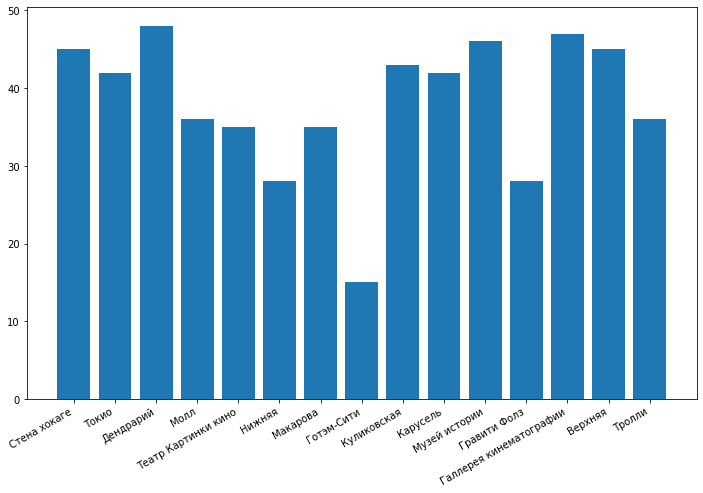

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12, 8])
plt.bar(locations, density_list)
plt.gcf().autofmt_xdate()

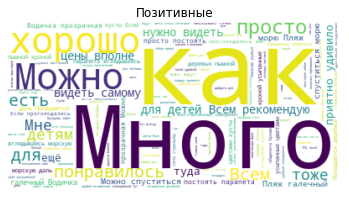

In [75]:
negative = []
positive = []
for i in range(0, len(rating)):
    if rating[i]<4:
        negative.append(text[i])
    else:
        positive.append(text[i])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Выделяем слова которые точно не должны использоваться при построении облака слов!
stopwords = set(STOPWORDS)
stopwords.update(["на", "все", "эта", "не", "уже", "это", "что", "по", "так", "но", 'какой', "очень", 'n', 'здесь', "место"])
#Создаем облако
wordcloud = WordCloud(stopwords = stopwords, background_color="white", min_word_length=3 ).generate(str(positive))

# Рисуем результат
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Позитивные')
plt.axis("off")
plt.show()

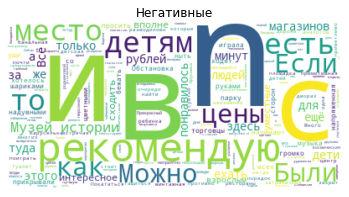

In [71]:
#Создаем облако
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(str(negative))

# Рисуем результат
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Негативные')
plt.axis("off")
plt.show()

In [76]:
colors = [ 'purple', 'orange', 'cadetblue', 'darkred', 'lightblue',  'beige', 'pink', 'white', 'red', 
          'gray', 'lightgreen', 'darkgreen', 'blue', 'lightred', 'lightgray', 'darkpurple','darkblue','black', 'green']
import folium
def set_colors(categories):
    dict_colors = {}
    for i in range(0, len(set(categories))):
        dict_colors[list(set(categories))[i]] = colors[i] 
    return dict_colors
dict_colors = set_colors(categories)

In [80]:
set(categories), len(locations)

({'Достопримечательность',
  'Жилой квартал',
  'Кафе',
  'Культура',
  'Набережная',
  'Парк',
  'Развлекательный центр'},
 15)

In [82]:
#создаем карту
m = folium.Map([37, 0], zoom_start=2, tiles='')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://yupest.github.io/nti/site/final1/maps/map3.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 0.6, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
)
# добавить изображение в карту
img.add_to(m)

for lat, lon, name, like, cat in zip(lattitudes, longitudes, locations, likes, categories):
    
    folium.CircleMarker(
        location=[lat, lon], 
        radius = like/3, 
        popup=name.encode('raw_unicode_escape').decode('utf-8'), 
        fill_color=dict_colors[cat], 
        color = None,
        fill_opacity = 1
    ).add_to(m)

m

In [84]:
from bs4 import BeautifulSoup # библиотека для парсинга - поиск информации по структуре тегов
import requests
html = requests.get('https://yupest.github.io/nti/site/final1/district2').text
soup = BeautifulSoup(html, 'lxml')
soup
locations = [r.text for r in soup.find_all('h2')][2:]
categories = [r['alt'] for r in soup.find_all('img')][2:]
print(set(categories))
text = [r.text for r in soup.find_all('p', {'class':'review'})]
rating = [int(r.text) for r in soup.find_all('span', {'class':'rating'})]
likes = [int(r.text) for r in soup.find_all('span', {'name':'count_likes'})]
lattitudes = [float(r.text) for r in soup.find_all('span', {'name':'lattitude'})]
longitudes = [float(r.text) for r in soup.find_all('span', {'name':'longitude'})]
density = [int(el.div['style'][7:-1]) for el in soup.find_all('div',{'class':'pipe line'})]
density_list = []
for i in range(0, len(density), 7):
#     функция .append добавляет значение в список density_list
    density_list.append(int(sum(density[i:i+7])/7))
#создаем карту
m = folium.Map([37, 0], zoom_start=2, tiles='')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://yupest.github.io/nti/site/final1/maps/map2.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 0.6, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
)
# добавить изображение в карту
img.add_to(m)

for lat, lon, name, like, cat in zip(lattitudes, longitudes, locations, likes, categories):
    
    folium.CircleMarker(
        location=[lat, lon], 
        radius = like/3, 
        popup=name.encode('raw_unicode_escape').decode('utf-8'), 
        fill_color=dict_colors[cat], 
        color = None,
        fill_opacity = 1
    ).add_to(m)

m

{'Достопримечательность', 'Жилой квартал', 'Развлекательный центр', 'Культура', 'Набережная', 'Парк'}


In [85]:
from bs4 import BeautifulSoup # библиотека для парсинга - поиск информации по структуре тегов
import requests
html = requests.get('https://yupest.github.io/nti/site/final1/district1').text
soup = BeautifulSoup(html, 'lxml')
soup
locations = [r.text for r in soup.find_all('h2')][2:]
categories = [r['alt'] for r in soup.find_all('img')][2:]
print(set(categories))
text = [r.text for r in soup.find_all('p', {'class':'review'})]
rating = [int(r.text) for r in soup.find_all('span', {'class':'rating'})]
likes = [int(r.text) for r in soup.find_all('span', {'name':'count_likes'})]
lattitudes = [float(r.text) for r in soup.find_all('span', {'name':'lattitude'})]
longitudes = [float(r.text) for r in soup.find_all('span', {'name':'longitude'})]
density = [int(el.div['style'][7:-1]) for el in soup.find_all('div',{'class':'pipe line'})]
density_list = []
for i in range(0, len(density), 7):
#     функция .append добавляет значение в список density_list
    density_list.append(int(sum(density[i:i+7])/7))
#создаем карту
m = folium.Map([37, 0], zoom_start=2, tiles='')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://yupest.github.io/nti/site/final1/maps/map1.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 0.6, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
)
# добавить изображение в карту
img.add_to(m)

for lat, lon, name, like, cat in zip(lattitudes, longitudes, locations, likes, categories):
    
    folium.CircleMarker(
        location=[lat, lon], 
        radius = like/3, 
        popup=name.encode('raw_unicode_escape').decode('utf-8'), 
        fill_color=dict_colors[cat], 
        color = None,
        fill_opacity = 1
    ).add_to(m)

m

{'Достопримечательность', 'Жилой квартал', 'Развлекательный центр', 'Набережная', 'Парк'}


**Создание координат**

In [33]:
import folium
import numpy as np
import pickle

In [2]:
places = np.load('site/tiles/coordinates1.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [3]:
places = places.item()

[[38.2727, 45.7031],
 [-79.5605, -42.1875],
 [48.4584, -118.8281],
 [-70.3779, -104.7656],
 [48.4584, 34.4531]]

In [132]:
colors = [ 'purple', 'orange', 'cadetblue', 'darkred', 'lightblue',  'beige', 'pink', 'white', 'red', 
          'gray', 'lightgreen', 'darkgreen', 'blue', 'lightred', 'lightgray', 'darkpurple','darkblue','black', 'green']

def set_colors(categories):
    dict_colors = {}
    for i in range(0, len(set(categories))):
        dict_colors[list(set(categories))[i]] = colors[i] 
    return dict_colors

In [154]:
places['map3']['Жилой квартал'] = [
    [77.3125,19.3359],
    [53.1204,37.0898],
    [-35.1738, -101.9531],
    [22.2688,-30.2344]
]

In [155]:
with open('tiles/data.pickle', 'wb') as f:
     pickle.dump(places, f)

In [152]:
l = []
for v in places['map3'].values():
    l.extend(v)
lats = [i[0] for i in l]
longs = [i[1] for i in l] 

In [153]:
#создаем карту
m = folium.Map([37, 0], zoom_start=1, tiles='') 
folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://yupest.github.io/nti/site/tiles/map3.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 1, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
).add_to(m)
folium.LatLngPopup().add_to(m)
for lat, lon in zip(lats, longs):
  
    folium.Marker(
        location=[lat, lon], # координаты широты и долготы
        icon=folium.Icon()
    ).add_to(m)
m

In [42]:
places['map1']= {
 'Набережная':[
     [ -67.3399,-101.6016],
     [48.9225,41.4844],
     [43.0689,-101.9531],
     [68.2694,90.0000]
    ],
 'Парк':[
     [-59.1759,-1.4063],
     [ -1.4061,-49.9219],
     [51.8358,-1.7578],
     [-0.3516,2.1094],
     [-9.7957,44.6484],
     [ 73.7758,-20.2148]
     
 ],
 'Другое':[
     [7.0137,31.2891],
     [21.6166,-27.2461],
     [53.8525,29.7070],
     [33.7243,-92.1094],
     [-24.5271,-106.8750],
     [-29.9930,-122.6953],
     [-29.5352, -68.3789],
     [80.0884,-94.0430],
     [-27.6835,-72.0703],
     [0.0000,-99.1406],
     [-29.5352,-92.4609],
     [46.6796,32.1680],
     [ 61.1856,-4.0430],
     [77.3125,13.3594],
     [80.9837,13.3594],
     [78.2066,26.0156]
 ]           
}
with open('site/tiles/data.pickle', 'wb') as f:
     pickle.dump(places, f)

In [23]:
coordinates['Культура'][0]==[-46.0732,120.3528]

True

Зеленые насаждения

In [1]:
import matplotlib.pyplot as plt

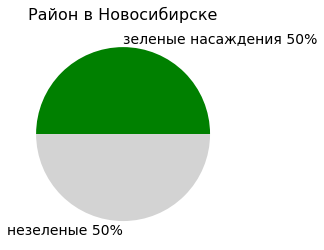

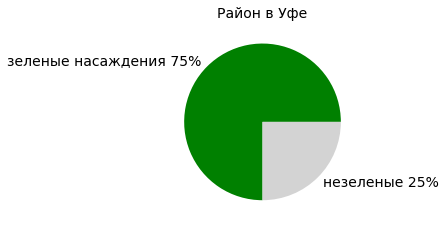

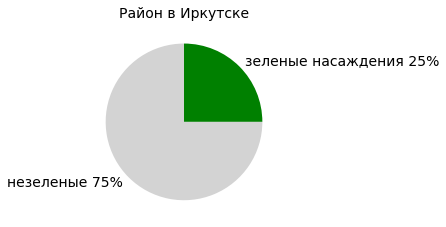

In [27]:
plt.rcParams['font.size'] = 14
# plt.figure(figsize=(10,10))
plt.title('Район в Новосибирске', fontsize = 16)
plt.pie([50,50], labels=['зеленые насаждения 50%', 'незеленые 50%'],colors=['green', 'lightgrey'])

plt.show()
plt.title('Район в Уфе', fontsize = 14)
plt.pie([75,25], labels=['зеленые насаждения 75%', 'незеленые 25%'],colors=['green', 'lightgrey'])
plt.gcf().autofmt_xdate()
plt.show()
plt.title('Район в Иркутске', fontsize = 14)
plt.pie([25,75], labels=['зеленые насаждения 25%', 'незеленые 75%'],colors=['green', 'lightgrey'])
plt.gcf().autofmt_xdate()
plt.show()

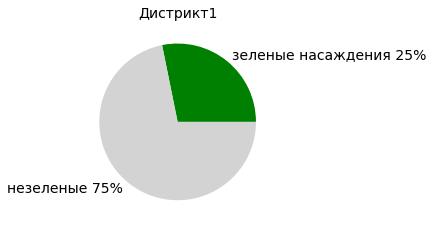

In [28]:
plt.title('Дистрикт1', fontsize = 14)
plt.pie([28.18,100-28.18], labels=['зеленые насаждения 25%', 'незеленые 75%'],colors=['green', 'lightgrey'])
plt.gcf().autofmt_xdate()
plt.show()